In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

In [34]:
r3 = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [35]:
r3

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [36]:
r3.response.value_counts()

no     9316
yes    1373
Name: response, dtype: int64

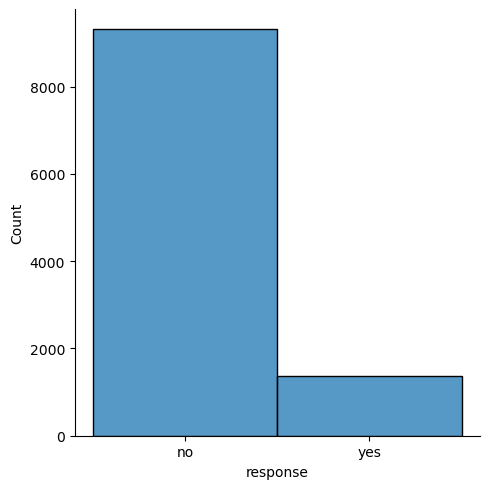

In [37]:
sns.displot(r3.response)

<AxesSubplot:xlabel='response', ylabel='count'>

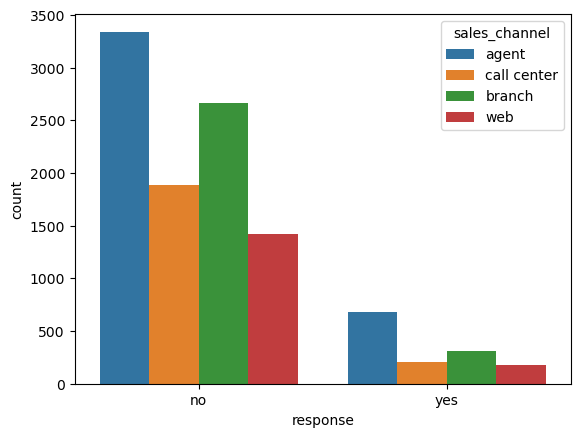

In [38]:
sns.countplot(x ='response', hue = "sales_channel", data = r3)

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

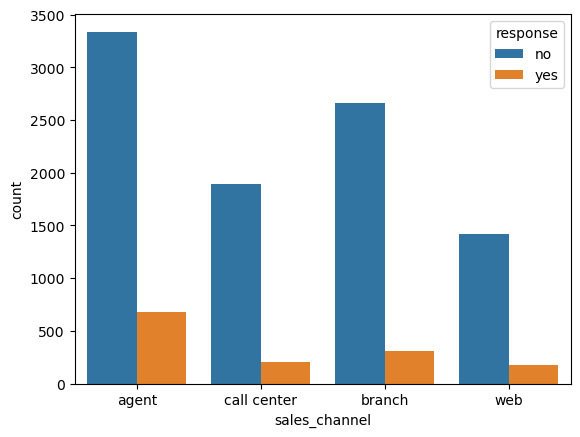

In [39]:
sns.countplot(x ='sales_channel', hue = "response", data = r3)

In [100]:
#response_data = 
#tca_100 = r3[(r3['total_claim_amount'].between(0,100)) & (r3['response']=='yes')]
#tca_100 = r3[(r3['total_claim_amount'].between(0,100)) & (r3['response']=='no')]

#tca_200 = r3[(r3['total_claim_amount'].between(100,200)) & (r3['response']=='yes')]
#tca_100 = r3[(r3['total_claim_amount'].between(0,100)) & (r3['response']=='no')]#bin_201_to_300
#bin_301_to_400
#bin_401_to_500
#bin_501_to_1000
#bin 1001_to_3000

tca_1 = r3[(r3['total_claim_amount'].between(0,100))]
tca_2 = r3[(r3['total_claim_amount'].between(100,200))]
tca_3 = r3[(r3['total_claim_amount'].between(200,300))]
tca_4 = r3[(r3['total_claim_amount'].between(300,400))]
tca_5 = r3[(r3['total_claim_amount'].between(400,500))]
tca_6 = r3[(r3['total_claim_amount'].between(2452,2893))]
tca_7 = r3[(r3['total_claim_amount'] >1000)]

tcas = [tca_1,tca_2,tca_3,tca_4,tca_5,tca_6,tca_7]
#tca_3.count()

r3['total_claim_amount'].sort_values().head(2137*6)


4485        0
2759        0
10317       0
3628        0
6865        0
         ... 
1316     2452
8007     2552
9614     2552
7734     2759
4434     2893
Name: total_claim_amount, Length: 10689, dtype: int64

In [74]:
bins = [0,213,333,453,597,2893]
r3['binned'] = pd.cut(r3['total_claim_amount'], bins)
r3['binned']

0         (213, 333]
1        (597, 2893]
2         (453, 597]
3         (453, 597]
4        (597, 2893]
            ...     
10684    (597, 2893]
10685     (213, 333]
10686     (333, 453]
10687    (597, 2893]
10688    (597, 2893]
Name: binned, Length: 10689, dtype: category
Categories (5, interval[int64, right]): [(0, 213] < (213, 333] < (333, 453] < (453, 597] < (597, 2893]]

<AxesSubplot:xlabel='binned', ylabel='count'>

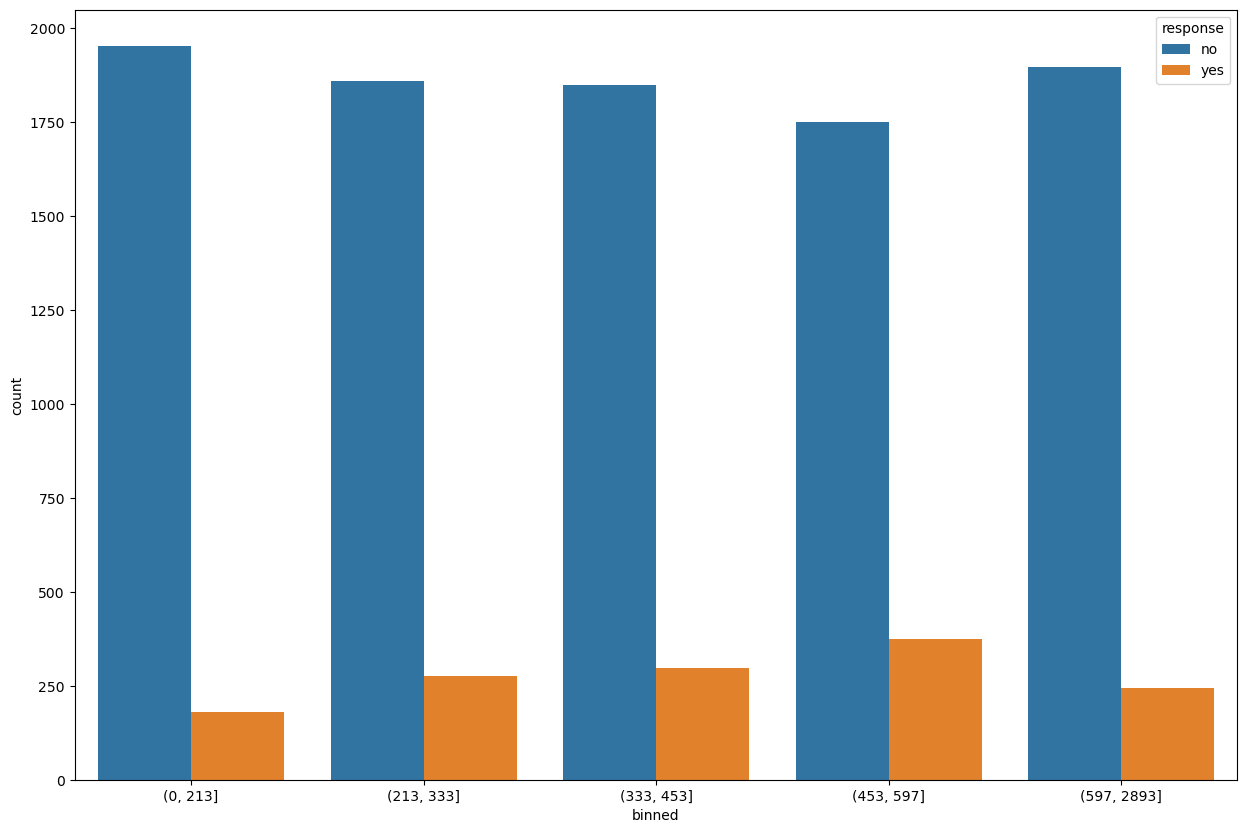

In [75]:
fig, axes = plt.subplots(1,1,figsize = (15,10))
sns.countplot(x='binned',hue='response',data=r3)

In [13]:
r3['income'].max()

99981

In [83]:
r3['income'].sort_values().head(2137)

7271     10037
8262     10074
3252     10088
7769     10097
10337    10097
         ...  
5463     26223
7112     26225
2694     26225
8872     26225
8194     26233
Name: income, Length: 2137, dtype: int64

In [14]:
bins2 = range(10000,100000,10000)
r3['binned2'] = pd.cut(r3['income'], bins2)
r3['binned2']

0        (40000.0, 50000.0]
1                       NaN
2        (20000.0, 30000.0]
3        (40000.0, 50000.0]
4        (20000.0, 30000.0]
                ...        
10684    (60000.0, 70000.0]
10685    (60000.0, 70000.0]
10686    (30000.0, 40000.0]
10687    (60000.0, 70000.0]
10688    (60000.0, 70000.0]
Name: binned2, Length: 10689, dtype: category
Categories (8, interval[int64, right]): [(10000, 20000] < (20000, 30000] < (30000, 40000] < (40000, 50000] < (50000, 60000] < (60000, 70000] < (70000, 80000] < (80000, 90000]]

<AxesSubplot:xlabel='binned2', ylabel='count'>

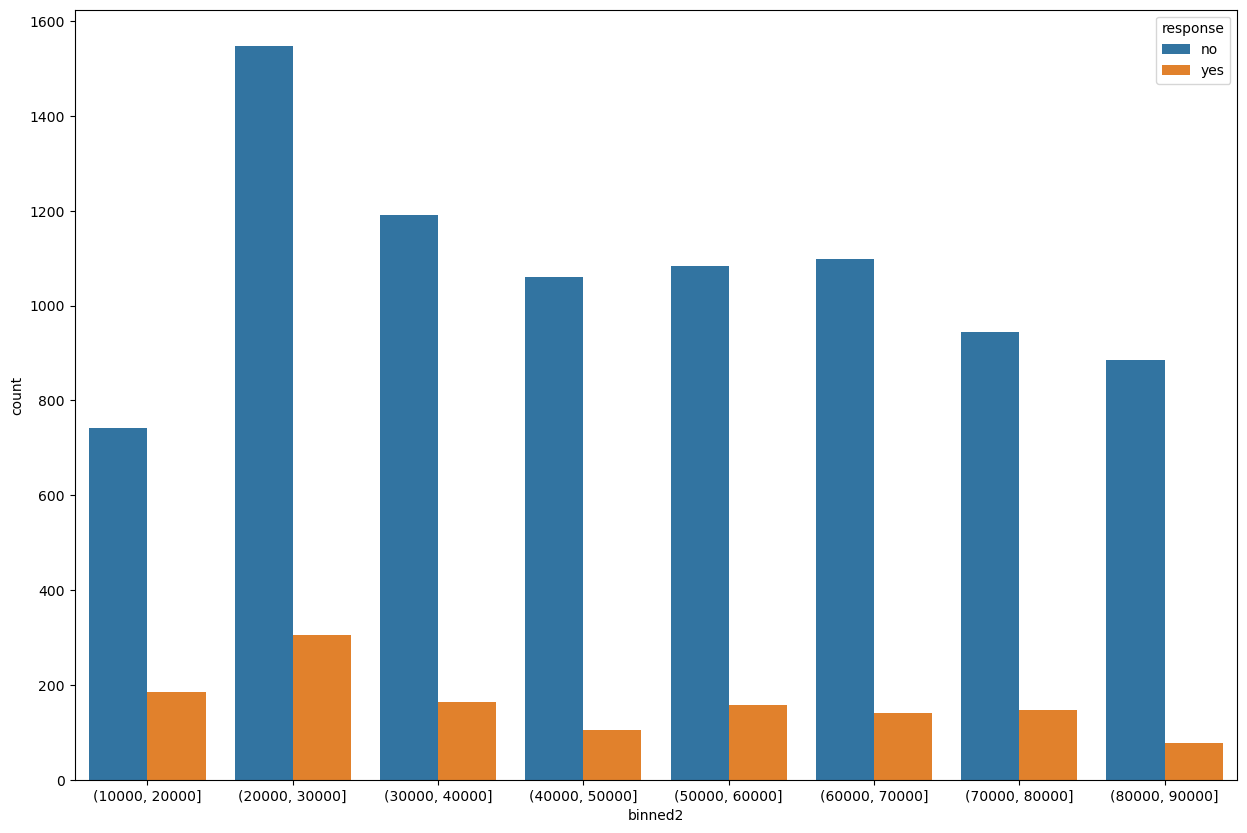

In [17]:
fig, axes = plt.subplots(1,1,figsize = (15,10))
sns.countplot(x='binned2',hue='response',data=r3)

In [95]:
bins3 = [0,26233,41025,58840,76697,99981]
r3['binned3'] = pd.cut(r3['income'], bins3)
r3['binned3']

0        (41025, 58840]
1        (76697, 99981]
2            (0, 26233]
3        (41025, 58840]
4            (0, 26233]
              ...      
10684    (58840, 76697]
10685    (58840, 76697]
10686    (26233, 41025]
10687    (58840, 76697]
10688    (58840, 76697]
Name: binned3, Length: 10689, dtype: category
Categories (5, interval[int64, right]): [(0, 26233] < (26233, 41025] < (41025, 58840] < (58840, 76697] < (76697, 99981]]

In [93]:
r3['income'].sort_values().head(2137*6)

7271     10037
8262     10074
3252     10088
7769     10097
10337    10097
         ...  
790      99934
5546     99960
10054    99961
8863     99971
9714     99981
Name: income, Length: 10689, dtype: int64

<AxesSubplot:xlabel='binned3', ylabel='count'>

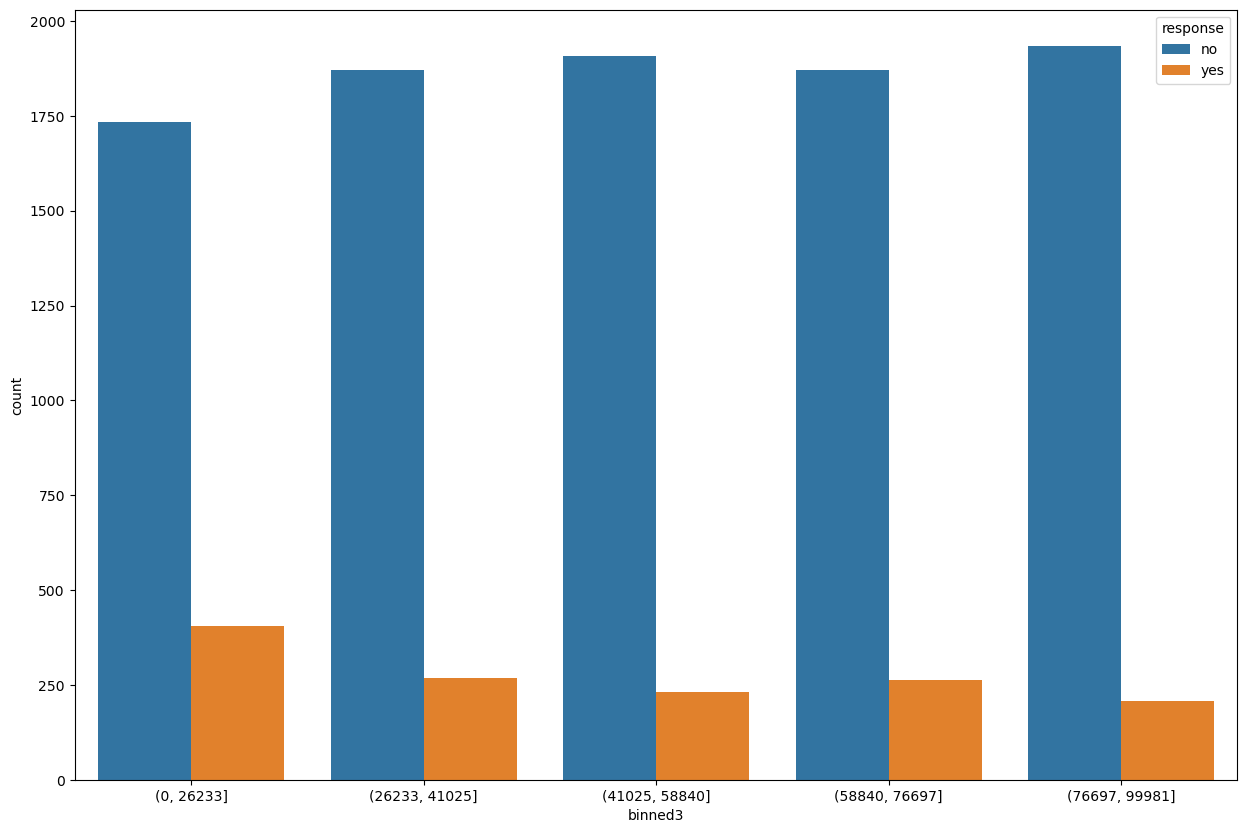

In [96]:
fig, axes = plt.subplots(1,1,figsize = (15,10))
sns.countplot(x='binned3',hue='response',data=r3)